# Analysis of Product Category Variable

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
amazon_data = pd.read_csv('../Datasets/clean_amazon_data.csv').drop(columns = ['Unnamed: 0'])

In [3]:
amazon_data.columns

Index(['category', 'title', 'price', 'rating', 'No of reviews'], dtype='object')

In [4]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9972 entries, 0 to 9971
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       9972 non-null   object 
 1   title          9972 non-null   object 
 2   price          9972 non-null   float64
 3   rating         9972 non-null   float64
 4   No of reviews  9972 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 389.7+ KB


In [5]:
amazon_data.head()

,category,title,price,rating,No of reviews
0,"['Kitchen & Dining', 'Kitchen Utensils & Gadge...",leifheit comfortline gourmet garlic slicer | f...,15.99,4.4,403
1,"['Health & Household', 'House Supplies', 'Hous...",food grade mineral oil cutting boards countert...,19.80,4.9,321
2,"['Automotive', 'RV Parts & Accessories', ' Lig...",srrb direct 1139 1383 led replacement r12 ba15...,15.99,4.4,321
3,"['Toys & Games', 'Hobbies', 'Trains & Accessor...",bachmann industries 50 sliding door box santa ...,53.99,4.5,9
4,"['Sports & Outdoors', 'Outdoor Recreation', 'C...",unisex cycling cap breathable anti-sweat helme...,29.95,4.0,11


In [6]:
amazon_data.columns = ['category', 'title', 'price', 'rating', 'num_reviews']
amazon_data

,category,title,price,rating,num_reviews
0,"['Kitchen & Dining', 'Kitchen Utensils & Gadge...",leifheit comfortline gourmet garlic slicer | f...,15.99,4.4,403
1,"['Health & Household', 'House Supplies', 'Hous...",food grade mineral oil cutting boards countert...,19.80,4.9,321
2,"['Automotive', 'RV Parts & Accessories', ' Lig...",srrb direct 1139 1383 led replacement r12 ba15...,15.99,4.4,321
3,"['Toys & Games', 'Hobbies', 'Trains & Accessor...",bachmann industries 50 sliding door box santa ...,53.99,4.5,9
4,"['Sports & Outdoors', 'Outdoor Recreation', 'C...",unisex cycling cap breathable anti-sweat helme...,29.95,4.0,11
...,...,...,...,...,...
9967,"['Sports & Outdoors', 'Fan Shop', 'Home & Kitc...",gtei dallas cowboys desk lamp,39.99,4.1,6
9968,"['Beauty & Personal Care', 'Skin Care', ' Suns...",jergens 20938 natural glow instant sun body mo...,10.68,4.3,8185
9969,"['Automotive', 'Performance Parts & Accessorie...",arp 201-6303 connecting rod bolt kit,8.68,5.0,2
9970,"['Automotive', 'Performance Parts & Accessorie...",walker 31533 exhaust gasket,10.20,4.2,55


In [7]:
amazon_data.iloc[0].title

'leifheit comfortline gourmet garlic slicer | finely cut slice vegetableswhite red'

## Formatting Category Variable For Easier Analysis

In [8]:
amazon_data['category'].dtype

dtype('O')

In [9]:
se = amazon_data['category'].iloc[0]
se

"['Kitchen & Dining', 'Kitchen Utensils & Gadgets', 'Graters, Peelers & Slicers', ' Mandolines & Slicers']"

In [10]:
def format_category(s):
    res = s[2:-2].replace("'", "").replace('"',"").split(", ")  # convert string to list 
    result = [s.strip() for s in res]           # noticed some leading and trailing whitespace in entries (see above cell)
    return set(result)                          # convert to set() for O(1) search 

In [11]:
format_category(amazon_data['category'][1])

{'Health & Household',
 'House Supplies',
 'Household Cleaning',
 'Waxes & Oils',
 'Wood Conditioners'}

In [12]:
type(format_category(amazon_data['category'][1]))

set

In [13]:
amazon_data['clean_category'] = amazon_data['category'].apply(format_category)
amazon_data['clean_category']

0       {Kitchen & Dining, Kitchen Utensils & Gadgets,...
1       {Wood Conditioners, Household Cleaning, Health...
2          {Lighting, Automotive, RV Parts & Accessories}
3       {Hobbies, Boxcars, Trains & Accessories, Toys ...
4       {Clothing, Sports & Outdoors, Outdoor Recreati...
                              ...                        
9967    {Sports & Outdoors, Lamps, Fan Shop, Home & Ki...
9968    {Skin Care, Sunscreens & Tanning Products, Bea...
9969    {Engines & Engine Parts, Engine Parts, Automot...
9970    {Gaskets, Exhaust System, Automotive, Performa...
9971    {Sports & Outdoors, Accessories, Outdoor Recre...
Name: clean_category, Length: 9972, dtype: object

In [38]:
amazon_data

,category,title,price,rating,num_reviews,clean_category
0,"['Kitchen & Dining', 'Kitchen Utensils & Gadge...",leifheit comfortline gourmet garlic slicer | f...,15.99,4.4,403,"{Kitchen & Dining, Kitchen Utensils & Gadgets,..."
1,"['Health & Household', 'House Supplies', 'Hous...",food grade mineral oil cutting boards countert...,19.80,4.9,321,"{Wood Conditioners, Household Cleaning, Health..."
2,"['Automotive', 'RV Parts & Accessories', ' Lig...",srrb direct 1139 1383 led replacement r12 ba15...,15.99,4.4,321,"{Lighting, Automotive, RV Parts & Accessories}"
3,"['Toys & Games', 'Hobbies', 'Trains & Accessor...",bachmann industries 50 sliding door box santa ...,53.99,4.5,9,"{Hobbies, Boxcars, Trains & Accessories, Toys ..."
4,"['Sports & Outdoors', 'Outdoor Recreation', 'C...",unisex cycling cap breathable anti-sweat helme...,29.95,4.0,11,"{Clothing, Sports & Outdoors, Outdoor Recreati..."
...,...,...,...,...,...,...
9967,"['Sports & Outdoors', 'Fan Shop', 'Home & Kitc...",gtei dallas cowboys desk lamp,39.99,4.1,6,"{Sports & Outdoors, Lamps, Fan Shop, Home & Ki..."
9968,"['Beauty & Personal Care', 'Skin Care', ' Suns...",jergens 20938 natural glow instant sun body mo...,10.68,4.3,8185,"{Skin Care, Sunscreens & Tanning Products, Bea..."
9969,"['Automotive', 'Performance Parts & Accessorie...",arp 201-6303 connecting rod bolt kit,8.68,5.0,2,"{Engines & Engine Parts, Engine Parts, Automot..."
9970,"['Automotive', 'Performance Parts & Accessorie...",walker 31533 exhaust gasket,10.20,4.2,55,"{Gaskets, Exhaust System, Automotive, Performa..."


In [43]:
# amazon_data.to_csv('../Datasets/cleaned_data_v2.csv')

In [14]:
categories = amazon_data['clean_category']

In [15]:
categories.describe()

count                                                  9972
unique                                                 7482
top       {Teachers Calendars & Planners, Education & Cr...
freq                                                      6
Name: clean_category, dtype: object

## Extracting and Examining Unique Category Values

In [16]:
category_list = set()
for cats in categories.values:
    category_list = category_list.union(cats)
category_list = sorted(list(category_list))

In [17]:
category_list = {}
for cats in categories.values:
    for c in cats:
        category_list[c] = category_list.setdefault(c, 0) + 1

In [18]:
category_list.items()

sories', 1), ('Noise Filters', 1), ('L-Lysine', 1), ('Parking Brake Shoes', 1), ('Pick-Up Tubes & Screens', 1), ('Temperature Probes & Sensors', 1), ('Raised Bowls', 2), ('Iron-on Transfers', 1), ('Students Scissors', 1), ('Marching Snare Drums', 1), ('Coffee Cups & Mugs', 1), ('Taco Sauce', 2), ('Bases & Melts', 2), ('Video Glasses', 1), ('Floss', 1), ('Fluorescent Lamps', 1), ('Bag Sealers', 1), ('Commercial Food Preparation Equipment', 2), ('Computer Paper', 1), ('Single Ear Bluetooth Headsets', 2), ('Chefs Knives', 1), ('Airlocks', 1), ('Lantern Accessories', 1), ('Dried Figs', 1), ('Grooving Inserts', 1), ('Incense Holders', 1), ('Multipurpose Bathroom Cleaners', 2), ('Holders', 1), ('Faucet Valves', 1), ('Electronic Keyboards', 1), ('Home Digital Pianos', 1), ('Picks', 1), ('Solar Battery Chargers & Charging Kits', 1), ('Spare & Replacement Parts', 1), ('Shampoos Plus Conditioners', 1), ('Feed Necks', 1), ('Lab Chemicals', 1), ('Backpacking Stoves', 1), ('Optical Drives', 1), ('P

In [19]:
category_df = pd.DataFrame.from_dict(category_list.items())
category_df.columns = ['category', 'frequency']
category_df.head()

,category,frequency
0,Kitchen & Dining,447
1,Kitchen Utensils & Gadgets,83
2,Peelers & Slicers,2
3,Mandolines & Slicers,1
4,Graters,2


In [20]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6656 entries, 0 to 6655
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   6656 non-null   object
 1   frequency  6656 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.1+ KB


In [21]:
category_df.sort_values('frequency', ascending = False, inplace = True, ignore_index = True)
category_df

,category,frequency
0,Sports & Outdoors,1390
1,Clothing,1358
2,Shoes & Jewelry,1111
3,Automotive,1109
4,Industrial & Scientific,886
...,...,...
6651,Cylinder Hoses,1
6652,Guiders & Wedges,1
6653,Infant & Toddler Beds,1
6654,Compression Bandages,1


## Top Categories

In [22]:
print(category_df['category'].values[0:5])

['Sports & Outdoors' 'Clothing' 'Shoes & Jewelry' 'Automotive'
 'Industrial & Scientific']


## Average Review by Category

In [23]:
'Graters' in amazon_data['clean_category'] 

False

In [24]:
amazon_data['clean_category'].apply(lambda x: 'Graters' in x)

0        True
1       False
2       False
3       False
4       False
        ...  
9967    False
9968    False
9969    False
9970    False
9971    False
Name: clean_category, Length: 9972, dtype: bool

In [25]:
amazon_data[amazon_data['clean_category'].apply(lambda x: 'Graters' in x)]['rating']

0       4.4
1081    2.8
Name: rating, dtype: float64

In [26]:
amazon_data[amazon_data['clean_category'].apply(lambda x: 'Graters' in x)][['price', 'rating']].mean()

price     10.97
rating     3.60
dtype: float64

In [27]:
for i in category_df.index:
    row = category_df.loc[i]
    category = row['category']
    contains_category = amazon_data['clean_category'].apply(lambda x: category in x)
   
    category_df.at[i, 'avg_rating'] =  amazon_data[contains_category]['rating'].mean()

In [28]:
category_df

,category,frequency,avg_rating
0,Sports & Outdoors,1390,4.376691
1,Clothing,1358,4.347054
2,Shoes & Jewelry,1111,4.341404
3,Automotive,1109,4.411903
4,Industrial & Scientific,886,4.429684
...,...,...,...
6651,Cylinder Hoses,1,4.400000
6652,Guiders & Wedges,1,4.000000
6653,Infant & Toddler Beds,1,4.700000
6654,Compression Bandages,1,4.700000


## Average value for multiple variables at once by category

In [56]:
def store_average_value(category_df, variables):
    
    var_names = ["avg_"+var for var in variables]
    
    for i in category_df.index:
        row = category_df.loc[i]        # row in df corresponding to category
        category = row['category']      # category name 
        contains_category = amazon_data['clean_category'].apply(lambda x: category in x)    # does the product fall in the category?
        category_df.loc[i, var_names] =  amazon_data[contains_category][variables].mean().values  # if so, average the variables we desire

    return category_df

In [30]:
category_df = store_average_value(category_df, ['price', 'rating'])

In [31]:
category_df

,category,frequency,avg_rating,avg_price
0,Sports & Outdoors,1390,4.376691,49.290036
1,Clothing,1358,4.347054,36.191775
2,Shoes & Jewelry,1111,4.341404,36.406724
3,Automotive,1109,4.411903,59.004734
4,Industrial & Scientific,886,4.429684,54.669944
...,...,...,...,...
6651,Cylinder Hoses,1,4.400000,27.030000
6652,Guiders & Wedges,1,4.000000,179.990000
6653,Infant & Toddler Beds,1,4.700000,100.485000
6654,Compression Bandages,1,4.700000,18.340000


In [57]:
category_df = store_average_value(category_df, ['num_reviews'])
category_df.head(5)

,Unnamed: 0,category,frequency,avg_rating,avg_price,avg_num_reviews
0,0,Sports & Outdoors,1390,4.376691,49.290036,436.865468
1,1,Clothing,1358,4.347054,36.191775,648.265832
2,2,Shoes & Jewelry,1111,4.341404,36.406724,682.820882
3,3,Automotive,1109,4.411903,59.004734,173.338142
4,4,Industrial & Scientific,886,4.429684,54.669944,286.321670


In [44]:
# category_df.to_csv('../Category-Centric-Datasets/category_data.csv')

### Preliminary Visualizations

In [33]:
category_df[0:10]

,category,frequency,avg_rating,avg_price,avg_num_reviews
0,Sports & Outdoors,1390,4.376691,49.290036,436.865468
1,Clothing,1358,4.347054,36.191775,648.265832
2,Shoes & Jewelry,1111,4.341404,36.406724,682.820882
3,Automotive,1109,4.411903,59.004734,173.338142
4,Industrial & Scientific,886,4.429684,54.669944,286.321670
5,Sports & Fitness,840,4.361905,47.842202,427.984524
6,Tools & Home Improvement,696,4.436207,54.722457,523.718391
7,Home & Kitchen,542,4.422878,60.060018,1361.575646
8,Health & Household,539,4.369202,28.081596,979.669759
9,Replacement Parts,507,4.450888,48.707623,104.149901


In [34]:
import matplotlib.ticker as ticker

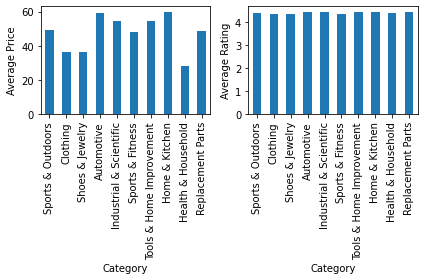

In [35]:
fig, axes = plt.subplots(1, 2)
category_df[0:10][['category','avg_price']].plot.bar(x="category", rot = 90, ylabel = "Average Price", xlabel = "Category", ax = axes[0], legend = False)
category_df[0:10][['category','avg_rating']].plot.bar(x="category", rot = 90, ylabel = "Average Rating", xlabel = "Category", ax = axes[ 1], legend = False)
fig.tight_layout()
plt.show()

## Semantic similarity between product categories: sentence-transformers -> K means

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import nltk
import transformers
import scipy

In [65]:
amazon_data = pd.read_csv('../Datasets/cleaned_data_v2.csv').drop(columns = ['Unnamed: 0'])
amazon_data['clean_category'] = amazon_data['clean_category'].apply(eval)  # converts to a set
category_df = pd.read_csv('../Category-Centric-Datasets/category_data.csv').drop(columns = ['Unnamed: 0'])

In [66]:
cat_list = category_df['category'].tolist()
cat_list

['Sports & Outdoors',
 'Clothing',
 'Shoes & Jewelry',
 'Automotive',
 'Industrial & Scientific',
 'Sports & Fitness',
 'Tools & Home Improvement',
 'Home & Kitchen',
 'Health & Household',
 'Replacement Parts',
 'Women',
 'Grocery & Gourmet Food',
 'Kitchen & Dining',
 'Outdoor Recreation',
 'Accessories',
 'Shops',
 'Electronics',
 'Men',
 'Toys & Games',
 'Office Products',
 'Patio',
 'Lawn & Garden',
 'Crafts & Sewing',
 'Arts',
 'Musical Instruments',
 'Pantry Staples',
 'Pet Supplies',
 'Power & Hand Tools',
 'Baby',
 'Beauty & Personal Care',
 'Office Supplies',
 'Hunting & Fishing',
 'Team Sports',
 'Computers & Accessories',
 'Motorcycle & ATV',
 'Instrument Accessories',
 'Camera & Photo',
 'Home Décor',
 'Fan Shop',
 'Girls',
 'Dogs',
 'Health Care',
 'Medical Supplies & Equipment',
 'Boys',
 'Performance Parts & Accessories',
 'House Supplies',
 'Cycling',
 'Parts',
 'Accessories & Supplies',
 'Shoes',
 'Furniture',
 'Vitamins & Dietary Supplements',
 'Bedding',
 'Power Too

In [5]:
from sentence_transformers import SentenceTransformer

In [6]:
# model = SentenceTransformer('bert-base-nli-mean-tokens')

In [7]:
if torch.cuda.is_available():
        device = torch.device('cuda:0')
        print('Running on GPU')
        print(torch.cuda.get_device_name(0))
else:   
    device = torch.device('cpu')
    print('Running on CPU')

Running on GPU
GeForce MX250


In [17]:
cat_embeddings = model.encode(cat_list, show_progress_bar=False)
cat_embeddings

array([[ 0.5592073 , -0.86118346,  1.8882433 , ...,  0.30373862,
        -0.74210054, -0.09859207],
       [ 0.61392426, -1.0210379 ,  1.6953125 , ...,  0.08544323,
        -0.35437107, -0.37547502],
       [ 0.7672335 , -0.04119372,  1.0019894 , ..., -0.37363565,
        -0.8154867 , -0.74389553],
       ...,
       [ 0.05154082,  0.21941689,  0.9410564 , ...,  0.1265108 ,
         0.40804583, -0.39985228],
       [ 0.55097926, -0.57766825,  1.4280589 , ...,  0.89438766,
         0.37720776,  0.02834453],
       [ 0.4905173 , -0.18066515,  1.6529633 , ...,  0.25797543,
        -0.5041143 , -0.5503925 ]], dtype=float32)

### K Means clustering based on semantic similarity

In [254]:
from sklearn.cluster import KMeans
import numpy as np

num_clusters = 20

clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(cat_embeddings)
cluster_assignment = clustering_model.labels_
cluster_assignment

array([ 6, 19,  5, ...,  3, 11, 10])

In [255]:
clusters = []
for i in range(num_clusters): 
    clusters.append([])
for i in range(len(cluster_assignment)):
    clusters[cluster_assignment[i]].append(cat_list[i])

In [256]:
clusters[0][1:20]

['Computers & Accessories',
 'Video Games',
 'Leisure Sports & Game Room',
 'Skateboards & Scooters',
 'Computer Accessories & Peripherals',
 'Remote & App Controlled Vehicles & Parts',
 'Audio & Video Accessories',
 'Cell Phones & Accessories',
 'Remote & App Controlled Vehicle Parts',
 'Tennis & Racquet Sports',
 'Portable Audio & Video',
 'Computer Components',
 'Casino Equipment',
 'Electronic Music & Karaoke',
 'Televisions & Video',
 'Wii',
 'Adult Toys & Games',
 'Wheelchairs',
 'PlayStation 4']

In [257]:
category_df['cluster_assignment'] = cluster_assignment
category_df

,category,frequency,avg_rating,avg_price,avg_num_reviews,cluster_assignment
0,Sports & Outdoors,1390,4.376691,49.290036,436.865468,6
1,Clothing,1358,4.347054,36.191775,648.265832,19
2,Shoes & Jewelry,1111,4.341404,36.406724,682.820882,5
3,Automotive,1109,4.411903,59.004734,173.338142,2
4,Industrial & Scientific,886,4.429684,54.669944,286.321670,7
...,...,...,...,...,...,...
6651,Cylinder Hoses,1,4.400000,27.030000,2.000000,14
6652,Guiders & Wedges,1,4.000000,179.990000,10.000000,9
6653,Infant & Toddler Beds,1,4.700000,100.485000,7486.000000,3
6654,Compression Bandages,1,4.700000,18.340000,551.000000,11


In [258]:
cat0 = category_df[category_df['category'].apply(lambda x: x in clusters[0])]
cat0.mean()

frequency                5.919679
avg_rating               4.272080
avg_price               79.419005
avg_num_reviews       2208.220295
cluster_assignment       0.000000
dtype: float64

In [260]:
cluster_means = []
for i in range(num_clusters):
    cluster_means.append(category_df[category_df['category'].apply(lambda x: x in clusters[i])].mean())

In [291]:
cluster_df = pd.concat(cluster_means, axis = 1)
cluster_df = cluster_df.transpose()
cluster_df

,frequency,avg_rating,avg_price,avg_num_reviews,cluster_assignment
0,5.919679,4.272080,79.419005,2208.220295,0.0
1,4.271003,4.439472,32.887011,444.422125,1.0
2,7.790875,4.418077,75.600288,265.977448,2.0
3,10.900000,4.350198,80.553952,1129.081960,3.0
4,7.812298,4.349243,41.879273,439.546389,4.0
5,5.819549,4.339286,38.800290,463.872722,5.0
6,14.986784,4.387148,60.515942,557.348123,6.0
7,8.334572,4.373859,67.210024,786.080758,7.0
8,2.500000,4.379517,49.122707,484.696672,8.0
9,5.095514,4.389994,48.325824,377.752515,9.0


#### Finding the centers of each cluster

In [292]:
cluster_centers =[]
for i in range(num_clusters): 
    center_point = clustering_model.cluster_centers_[i, :]
    distances = np.linalg.norm(np.array(cat_embeddings) - center_point, axis = 1)
    min_word = np.argmin(distances)
    cluster_centers.append(cat_list[min_word])

cluster_df.insert(0, "cluster_center", cluster_centers)
cluster_df

,cluster_center,frequency,avg_rating,avg_price,avg_num_reviews,cluster_assignment
0,Computer Accessories & Peripherals,5.919679,4.272080,79.419005,2208.220295,0.0
1,Measuring & Layout Tools,4.271003,4.439472,32.887011,444.422125,1.0
2,Throttle Body Spacers & Adapters,7.790875,4.418077,75.600288,265.977448,2.0
3,Beds & Furniture,10.900000,4.350198,80.553952,1129.081960,3.0
4,Food Pans,7.812298,4.349243,41.879273,439.546389,4.0
5,Coverlets & Sets,5.819549,4.339286,38.800290,463.872722,5.0
6,Planters,14.986784,4.387148,60.515942,557.348123,6.0
7,Electrical & Batteries,8.334572,4.373859,67.210024,786.080758,7.0
8,Disposables,2.500000,4.379517,49.122707,484.696672,8.0
9,Totes,5.095514,4.389994,48.325824,377.752515,9.0


In [293]:
clusters[0][1:10]

['Computers & Accessories',
 'Video Games',
 'Leisure Sports & Game Room',
 'Skateboards & Scooters',
 'Computer Accessories & Peripherals',
 'Remote & App Controlled Vehicles & Parts',
 'Audio & Video Accessories',
 'Cell Phones & Accessories',
 'Remote & App Controlled Vehicle Parts']

#### Visualize clusters by price, number of reviews, rating

In [264]:
from wordcloud import WordCloud

##### by price

In [268]:
cluster_freq = dict(zip(list(cluster_df["cluster_center"].values), list(cluster_df["avg_price"].values) ))

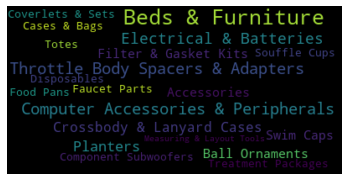

In [269]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=cluster_freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [275]:
# cluster_df.to_csv('../Category-Centric-Datasets/clustered_categories_20.csv')

#### by price, reviews, rating

In [325]:
%%html
<iframe src="https://preview.flourish.studio/6098857/sxTRIdM3KaNS597NvrQnLG73yGKS5-na66wqoFgmV44zcGUCYj4-xaBXZI53_71G/" width="1000" height="600"></iframe>

### Plotting K means clusters

#### Trying to use just PCA to project to 2D


In [280]:
# Trying to use just PCA

from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
cat_pca = pca.fit_transform(cat_embeddings)
 
cat_pca.shape

(6656, 2)

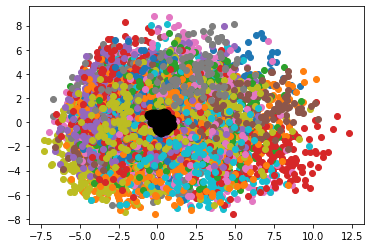

In [248]:
for i in range(num_clusters): 
    cat_2d = cat_pca[category_df[category_df['cluster_assignment']==i].index, :]
    plt.scatter(cat_2d[:, 0], cat_2d[:, 1])

centroids = clustering_model.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')

#### Using TSNE to project to 2D 

In [283]:
from sklearn.manifold import TSNE

In [327]:
# optionally perform pca to 50d first
pca = PCA(50)
cat_pca50 = pca.fit_transform(cat_embeddings)
cat_pca50.shape

(6656, 50)

In [299]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(cat_embeddings)  # can be changed to cat_pca50 

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6656 samples in 0.004s...
[t-SNE] Computed neighbors for 6656 samples in 1.371s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6656
[t-SNE] Computed conditional probabilities for sample 2000 / 6656
[t-SNE] Computed conditional probabilities for sample 3000 / 6656
[t-SNE] Computed conditional probabilities for sample 4000 / 6656
[t-SNE] Computed conditional probabilities for sample 5000 / 6656
[t-SNE] Computed conditional probabilities for sample 6000 / 6656
[t-SNE] Computed conditional probabilities for sample 6656 / 6656
[t-SNE] Mean sigma: 4.213665
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.713196
[t-SNE] KL divergence after 300 iterations: 3.070060


In [306]:
tsne_results.shape

(6656, 2)

In [308]:
category_df["TSNE_X_coord"] = tsne_results[:, 0]
category_df["TSNE_Y_coord"] = tsne_results[:, 1]
category_df

,category,frequency,avg_rating,avg_price,avg_num_reviews,cluster_assignment,TSNE_X_coord,TSNE_Y_coord
0,Sports & Outdoors,1390,4.376691,49.290036,436.865468,6,-5.171796,-3.111650
1,Clothing,1358,4.347054,36.191775,648.265832,19,-1.459046,3.167043
2,Shoes & Jewelry,1111,4.341404,36.406724,682.820882,5,0.573368,5.561355
3,Automotive,1109,4.411903,59.004734,173.338142,2,-5.778273,6.551750
4,Industrial & Scientific,886,4.429684,54.669944,286.321670,7,-0.202094,8.945949
...,...,...,...,...,...,...,...,...
6651,Cylinder Hoses,1,4.400000,27.030000,2.000000,14,3.039352,-3.366728
6652,Guiders & Wedges,1,4.000000,179.990000,10.000000,9,-4.052610,0.320658
6653,Infant & Toddler Beds,1,4.700000,100.485000,7486.000000,3,5.252740,3.743536
6654,Compression Bandages,1,4.700000,18.340000,551.000000,11,1.242093,-1.912583


In [309]:
# category_df.to_csv('../Results/category_df_clustered.csv')

In [329]:
%%html
<iframe src="https://preview.flourish.studio/6099274/2Zg3HJIFtGOxTmzy2KrrUFUjjC4Dyclt5bH2eBbC0fJdHsedHX2cHEkJiSkpSB4D/" width="1200" height="800"></iframe>

## References 
* https://towardsdatascience.com/cutting-edge-semantic-search-and-sentence-similarity-53380328c655